## tuning regularization parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import wobble

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
starname = '51peg'
r = 57
#xlim = [4050, 4055]
xlim = [5940, 5955]
#ylim = [0.3, 1.1]
ylim = [0.6, 1.05]
#ylim = None

In [3]:
data = wobble.Data(starname+'_e2ds.hdf5', filepath='data/', orders=[r])
model = wobble.Model(data)
model.add_star('star')
model.add_telluric('tellurics', rvs_fixed=True, variable_bases=3)

In [4]:
model.components[0].L1_template = 1.e1 # star
model.components[0].L2_template = 1.e3   # star
model.components[1].L1_template = 1.e3 # tellurics
model.components[1].L2_template = 1.e6   # tellurics
model.components[1].L1_basis_vectors = 1.e2
model.components[1].L2_basis_vectors = 1.e5
model.components[1].L2_basis_weights = 1. # by definition

In [5]:
results = wobble.optimize_order(model, data, 0, niter=50, save_history=False, basename=starname)
#history = wobble.History(model, data, 0, 50, filename=starname+'_o0_history.hdf5')

100%|██████████| 50/50 [00:11<00:00,  4.43it/s]


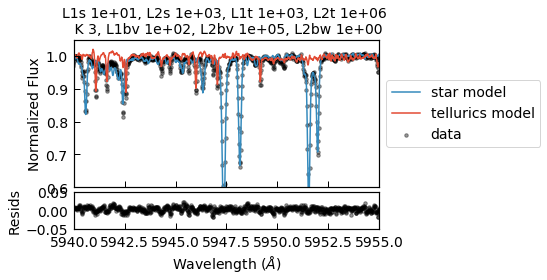

In [12]:
e = 12 # random
fig, (ax, ax2) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 1]})
ax.plot(np.exp(results.xs[0][e]), np.exp(results.star_ys_predicted[0][e]), label='star model', lw=1.5)
ax.plot(np.exp(results.xs[0][e]), np.exp(results.tellurics_ys_predicted[0][e]), label='tellurics model', lw=1.5)
ax.scatter(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]), marker=".", alpha=0.4, c='k', label='data')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_ylabel('Normalized Flux', fontsize=14)
ax2.scatter(np.exp(results.xs[0][e]), np.exp(results.ys[0][e]) - np.exp(results.ys_predicted[0][e]), marker=".", alpha=0.4, c='k')
ax2.set_xlim(xlim)
ax2.set_ylim([-0.05, 0.05])
ax2.set_xlabel(r'Wavelength ($\AA$)', fontsize=14)
ax2.set_ylabel('Resids', fontsize=14)

# Shrink current axis by 50%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

ax.set_title('L1s {0:.0e}, L2s {1:.0e}, L1t {2:.0e}, L2t {3:.0e} \n K {4}, L1bv {5:.0e}, L2bv {6:.0e}, L2bw {7:.0e}'.format(
    model.components[0].L1_template, model.components[0].L2_template,
    model.components[1].L1_template, model.components[1].L2_template,
    model.components[1].K, model.components[1].L1_basis_vectors, 
    model.components[1].L2_basis_vectors, model.components[1].L2_basis_weights),
    fontsize=14)
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)
#plt.savefig('regularization/L1s{0:.0e}_L2s{1:.0e}_L1t{2:.0e}_L2t{3:.0e}_K{4}_L1bv{5:.0e}_L2bv{6:.0e}_L2bw{7:.0e}.png'.format(
#    model.components[0].L1_template, model.components[0].L2_template,
#    model.components[1].L1_template, model.components[1].L2_template,
#    model.components[1].K, model.components[1].L1_basis_vectors, 
#    model.components[1].L2_basis_vectors, model.components[1].L2_basis_weights));

In [14]:
print(np.logspace(-1.0, 1.0, num=3))

[ 0.1  1.  10. ]


In [15]:
xs = np.exp(results.xs[0][e])

In [21]:
np.percentile(xs,20.) - 7.5

5914.584960937495